### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda2.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Silla de oficina,Muebles,283600.0,15300.0,04/08/2021,Izabela de León,Medellín,1,Nequi,1,6.25184,-75.56359
1,Pandereta,Instrumentos musicales,76800.0,2300.0,26/11/2020,Blanca Ramirez,Medellín,3,Tarjeta de crédito,4,6.25184,-75.56359
2,Cama king,Muebles,443300.0,23800.0,22/10/2021,Izabela de León,Pereira,5,Tarjeta de crédito,10,4.81333,-75.69611
3,Cama king,Muebles,906200.0,46400.0,04/05/2022,Maria Alfonso,Cali,5,Tarjeta de crédito,10,3.43722,-76.52250
4,Silla de oficina,Muebles,397800.0,19400.0,26/02/2022,Lucas Olivera,Bogotá,4,Tarjeta de crédito,3,4.60971,-74.08175


#1. Análisis de facturación



     Tienda      Ingresos
0  Tienda 1  1.150880e+09
1  Tienda 2  1.116344e+09
2  Tienda 3  1.098020e+09
3  Tienda 4  1.038376e+09


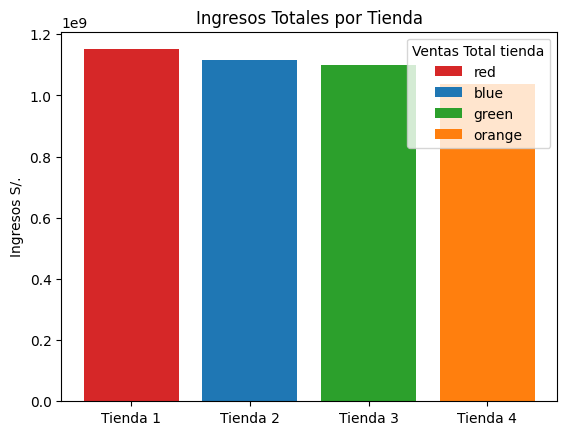

In [2]:
df_tienda = pd.DataFrame(tienda)
total_ingreso_tienda=df_tienda['Precio'].sum()

df_tienda2 = pd.DataFrame(tienda2)
total_ingreso_tienda2=df_tienda2['Precio'].sum()

df_tienda3 = pd.DataFrame(tienda3)
total_ingreso_tienda3=df_tienda3['Precio'].sum()

df_tienda4 = pd.DataFrame(tienda4)
total_ingreso_tienda4=df_tienda4['Precio'].sum()

ingresos_tiendas = {
                'Tienda':['Tienda 1',
                'Tienda 2',
                'Tienda 3',
                'Tienda 4'],
                'Ingresos':[total_ingreso_tienda,
                total_ingreso_tienda2,
                total_ingreso_tienda3,
                total_ingreso_tienda4]}

#index_labels = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

#df_ingresos_tiendas=pd.DataFrame(ingresos_tiendas,index_labels)
df_ingresos_tiendas=pd.DataFrame(ingresos_tiendas)
print(df_ingresos_tiendas)

#print(f'Ingreso T1: {total_ingreso_tienda} / Ingreso T2: {total_ingreso_tienda2} / Ingreso T3: {total_ingreso_tienda3} / Ingreso T4: {total_ingreso_tienda4} /')

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

x_values = df_ingresos_tiendas['Tienda'].unique()
y_values = df_ingresos_tiendas['Ingresos']
bar_labels = ['red', 'blue', 'green', 'orange']
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']

ax.bar(x_values, y_values,label=bar_labels,color=bar_colors)

ax.set_ylabel('Ingresos S/.')
ax.set_title('Ingresos Totales por Tienda')
ax.legend(title='Ventas Total tienda')

plt.show()
plt.close('all')


# 2. Ventas por categoría

In [6]:
df_group_tienda = df_tienda.groupby('Categoría del Producto').size().sort_values(ascending=False).head(1)
df_group_tienda2 = df_tienda2.groupby('Categoría del Producto').size().sort_values(ascending=False).head(1)
df_group_tienda3 = df_tienda3.groupby('Categoría del Producto').size().sort_values(ascending=False).head(1)
df_group_tienda4 = df_tienda4.groupby('Categoría del Producto').size().sort_values(ascending=False).head(1)

Ventas_Categoria = {
                'Tienda':['Tienda 1',
                'Tienda 2',
                'Tienda 3',
                'Tienda 4'],
                'Categoria':['Muebles',
                'Muebles',
                'Muebles',
                'Muebles'],
                'Cantidad Vendida':[df_group_tienda.Muebles,
                df_group_tienda2.Muebles,
                df_group_tienda3.Muebles,
                df_group_tienda4.Muebles]}

df_ventas_categoria=pd.DataFrame(Ventas_Categoria)
print(df_ventas_categoria)
df_ventas_categoria.dtypes

#print(df_group_tienda)
#print(df_group_tienda2)
#print(df_group_tienda3)
#print(df_group_tienda4)


     Tienda Categoria  Cantidad Vendida
0  Tienda 1   Muebles               465
1  Tienda 2   Muebles               442
2  Tienda 3   Muebles               499
3  Tienda 4   Muebles               480


,0
Tienda,object
Categoria,object
Cantidad Vendida,int64


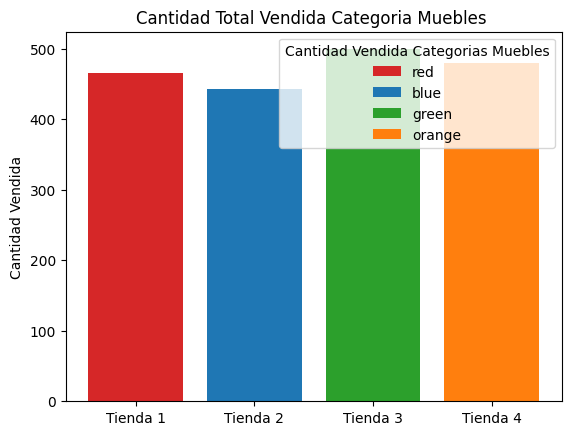

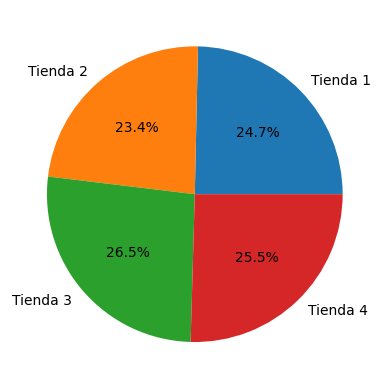

In [7]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

x_values = df_ventas_categoria['Tienda'].unique()
y_values = df_ventas_categoria['Cantidad Vendida']
bar_labels = ['red', 'blue', 'green', 'orange']
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']

ax.bar(x_values, y_values,label=bar_labels,color=bar_colors)

ax.set_ylabel('Cantidad Vendida')
ax.set_title('Cantidad Total Vendida Categoria Muebles ')
ax.legend(title='Cantidad Vendida Categorias Muebles')

plt.show()
plt.close('all')

plt.pie(df_ventas_categoria['Cantidad Vendida'], labels=df_ventas_categoria['Tienda'],autopct='%1.1f%%')
plt.show()
plt.close('all')

#plt( kind='pie', y='Cantidad Vendida', autopct='%1.0f%%')

# 3. Calificación promedio de la tienda


In [8]:
Calificacion_promedio_tienda = df_tienda['Calificación'].mean()
#print(Calificacion_promedio_tienda)
Calificacion_promedio_tienda2 = df_tienda2['Calificación'].mean()
#print(Calificacion_promedio_tienda2
Calificacion_promedio_tienda3 = df_tienda3['Calificación'].mean()
#print(Calificacion_promedio_tienda3)
Calificacion_promedio_tienda4 = df_tienda4['Calificación'].mean()
#print(Calificacion_promedio_tienda4)

     Tienda  Calificacion Promedio
0  Tienda 1               3.976685
1  Tienda 2               4.037304
2  Tienda 3               4.048326
3  Tienda 4               3.995759


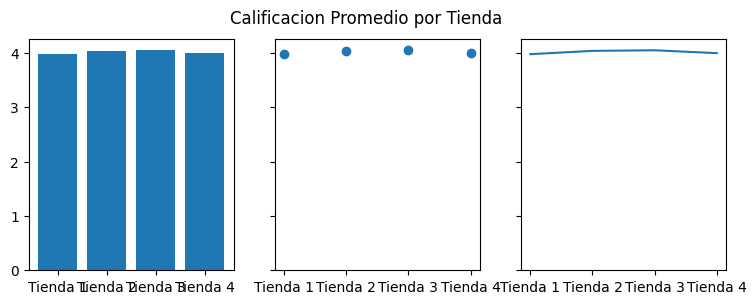

In [30]:
calificacion_tiendas = {
                'Tienda':['Tienda 1',
                'Tienda 2',
                'Tienda 3',
                'Tienda 4'],
                'Calificacion Promedio':[Calificacion_promedio_tienda,
                Calificacion_promedio_tienda2,
                Calificacion_promedio_tienda3,
                Calificacion_promedio_tienda4]}

df_calificacion_tienda=pd.DataFrame(calificacion_tiendas)
print(df_calificacion_tienda)

import matplotlib.pyplot as plt

x_values = df_calificacion_tienda['Tienda'].unique()
y_values = df_calificacion_tienda['Calificacion Promedio']

fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
axs[0].bar(x_values, y_values)
axs[1].scatter(x_values, y_values)
axs[2].plot(x_values, y_values)
fig.suptitle('Calificacion Promedio por Tienda')

plt.show()
plt.close('all')


# 4. Productos más y menos vendidos

In [9]:
#group_productos_vendidost1= df_tienda.groupby('Producto')['Precio'].sum().agg(['min', 'max'])
#group_productos_vendidost1= df_tienda.groupby('Producto')['Precio'].sum().sort_values(ascending=False)
#print(f'Maximo: {group_productos_vendidost1.head(1)}')
#print(f'Minimo: {group_productos_vendidost1.tail(1)}')

#group_productos_vendidost2= df_tienda2.groupby('Producto')['Precio'].sum().sort_values(ascending=False)
#print(f'Maximo: {group_productos_vendidost2.head(1)}')
#print(f'Minimo: {group_productos_vendidost2.tail(1)}')

#group_productos_vendidost3= df_tienda3.groupby('Producto')['Precio'].sum().sort_values(ascending=False)
#print(f'Maximo: {group_productos_vendidost3.head(1)}')
#print(f'Minimo: {group_productos_vendidost3.tail(1)}')

#group_productos_vendidost4= df_tienda4.groupby('Producto')['Precio'].sum().sort_values(ascending=False)
#print(f'Maximo: {group_productos_vendidost4.head(1)}')
#print(f'Minimo: {group_productos_vendidost4.tail(1)}')

#group_productos_vendidost1['name']

#producto_masvendido1 = df_tienda.groupby('Producto').sum()['Precio'].sort_values(ascending=False).head(1)
#producto_menosvendido1=df_tienda.groupby('Producto').sum()['Precio'].sort_values(ascending=False).tail(1)

df1=df_tienda.groupby(['Producto'])[['Precio']].sum()
df2=df_tienda2.groupby(['Producto'])[['Precio']].sum()
df3=df_tienda3.groupby(['Producto'])[['Precio']].sum()
df4=df_tienda4.groupby(['Producto'])[['Precio']].sum()
#print(df1['Precio'].idxmin())
#print(df1['Precio'].min())
#print(df1['Precio'].min(),end="")


#print(df1['Precio'].idxmax())
#print(df1['Precio'].max())
#print(df1['Precio'].max(),end="")

lsProducto_Mas_vendido = {
                'Tienda':['Tienda 1',
                'Tienda 2',
                'Tienda 3',
                'Tienda 4'],
                'Producto':[df1['Precio'].idxmax(),
                df2['Precio'].idxmax(),
                df3['Precio'].idxmax(),
                df4['Precio'].idxmax()],
                'Venta Total':[df1['Precio'].max(),
                df2['Precio'].max(),
                df3['Precio'].max(),
                df4['Precio'].max()]}

df_prodmasvendido_tienda=pd.DataFrame(lsProducto_Mas_vendido)
print(df_prodmasvendido_tienda)


lsProducto_Menos_vendido = {
                'Tienda':['Tienda 1',
                'Tienda 2',
                'Tienda 3',
                'Tienda 4'],
                'Producto':[df1['Precio'].idxmin(),
                df2['Precio'].idxmin(),
                df3['Precio'].idxmin(),
                df4['Precio'].idxmin()],
                'Venta Total':[df1['Precio'].min(),
                df2['Precio'].min(),
                df3['Precio'].min(),
                df4['Precio'].min()]}

df_prodmenosvendido_tienda=pd.DataFrame(lsProducto_Menos_vendido)
print(df_prodmenosvendido_tienda)

     Tienda       Producto  Venta Total
0  Tienda 1  TV LED UHD 4K  142150200.0
1  Tienda 2      Iphone 15  113225800.0
2  Tienda 3   Refrigerador   99889700.0
3  Tienda 4      Iphone 15   96697500.0
     Tienda            Producto  Venta Total
0  Tienda 1  Cuerda para saltar     652800.0
1  Tienda 2     Cubo mágico 8x8     643600.0
2  Tienda 3     Cubo mágico 8x8     640400.0
3  Tienda 4  Cuerda para saltar     704800.0


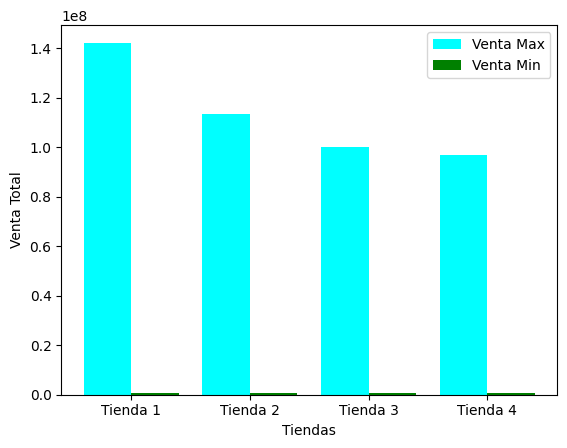

In [37]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(4)
width = 0.4

plt.bar(x-0.2,df_prodmasvendido_tienda['Venta Total'], width, color='cyan')
plt.bar(x+0.2,df_prodmenosvendido_tienda['Venta Total'], width, color='green')
plt.xticks(x, ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'])
plt.xlabel("Tiendas")
plt.ylabel("Venta Total")
plt.legend(["Venta Max", "Venta Min"])
plt.show()
plt.close('all')

# 5. Envío promedio por tienda

     Tienda   Costo Envio
0  Tienda 1  26018.609580
1  Tienda 2  25216.235693
2  Tienda 3  24805.680373
3  Tienda 4  23459.457167


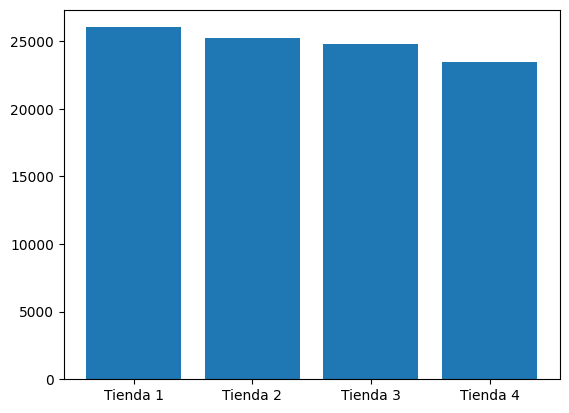

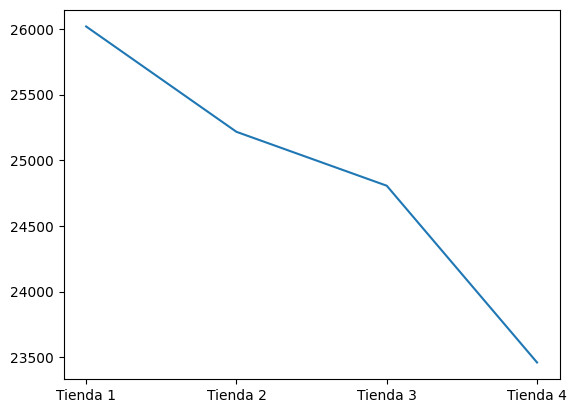

In [10]:
Costo_envio_promedio_tienda = df_tienda['Costo de envío'].mean()
#print(Costo_envio_promedio_tienda)

Costo_envio_promedio_tienda2 = df_tienda2['Costo de envío'].mean()
#print(Costo_envio_promedio_tienda2)

Costo_envio_promedio_tienda3 = df_tienda3['Costo de envío'].mean()
#print(Costo_envio_promedio_tienda3)

Costo_envio_promedio_tienda4 = df_tienda4['Costo de envío'].mean()
#print(Costo_envio_promedio_tienda4)

costo_envio_tiendas = {
                'Tienda':['Tienda 1',
                'Tienda 2',
                'Tienda 3',
                'Tienda 4'],
                'Costo Envio':[Costo_envio_promedio_tienda,
                Costo_envio_promedio_tienda2,
                Costo_envio_promedio_tienda3,
                Costo_envio_promedio_tienda4]}

df_costo_envio_tienda=pd.DataFrame(costo_envio_tiendas)
print(df_costo_envio_tienda)

import matplotlib.pyplot as plt

x_values = df_costo_envio_tienda['Tienda'].unique()
y_values = df_costo_envio_tienda['Costo Envio']
plt.bar(x_values, y_values)
plt.show()
plt.close('all')

plt.plot(x_values, y_values)
plt.show()
plt.close('all')


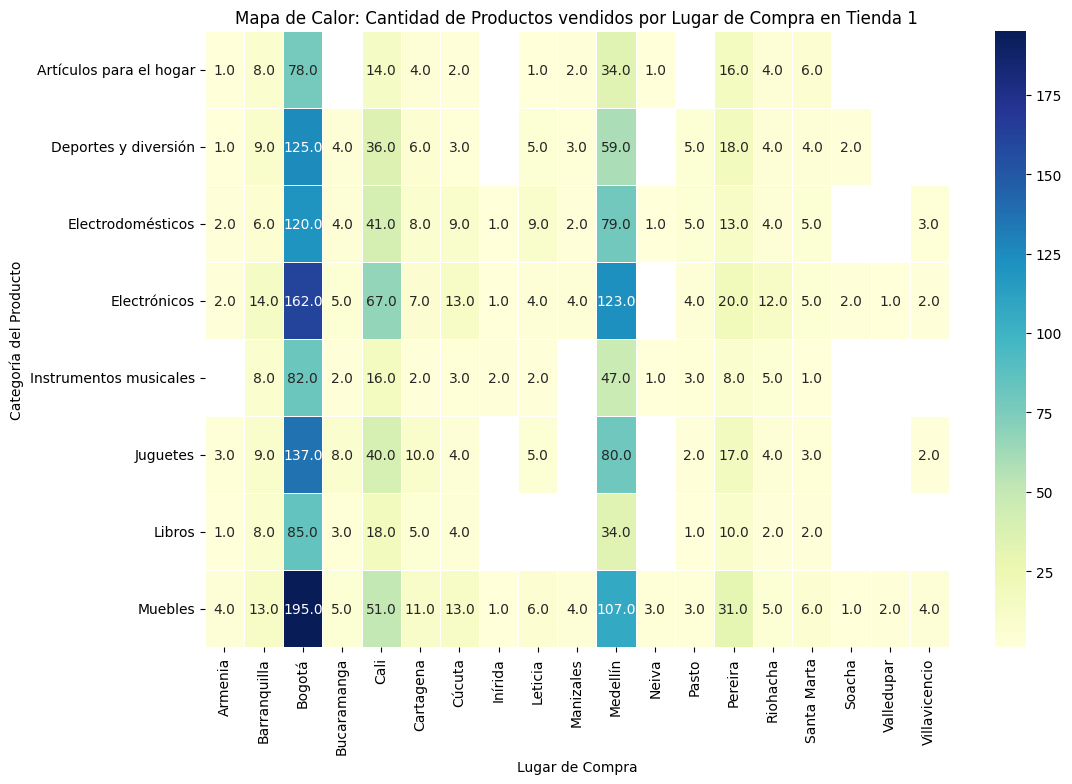

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.figure(figsize=(12, 8))
heatmap_data = df_tienda.pivot_table(index='Categoría del Producto', columns='Lugar de Compra', values='Precio', aggfunc='count')
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt=".1f", linewidths=.5)
plt.title('Mapa de Calor: Cantidad de Productos vendidos por Lugar de Compra en Tienda 1')
plt.show()



In [27]:
import plotly.graph_objects as go


df_tienda.head()

df_tienda['text'] = df_tienda['Producto'] + '<br>Venta de: ' + (df_tienda['Precio']/1e6).astype(str)+' million'
limits = [(0,3),(3,11),(11,21),(21,50),(50,3000)]
colors = ["royalblue","crimson","lightseagreen","orange","lightgrey"]
cities = []
scale = 5000

fig = go.Figure()

for i in range(len(limits)):
    lim = limits[i]
    df_sub = df_tienda[lim[0]:lim[1]]
    fig.add_trace(go.Scattergeo(
        locationmode = 'USA-states',
        lon = df_sub['lon'],
        lat = df_sub['lat'],
        text = df_sub['text'],
        marker = dict(
            size = df_sub['Precio']/scale,
            color = colors[i],
            line_color='rgb(40,40,40)',
            line_width=0.5,
            sizemode = 'area'
        ),
        name = '{0} - {1}'.format(lim[0],lim[1])))

fig.update_layout(
        title_text = 'Ventas de Productos por Pais Tienda 1',
        showlegend = True,
        geo = dict(
            scope = 'south america',
            landcolor = 'rgb(217, 217, 217)',
        )
    )

fig.show()